In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline  

In [2]:
# Load the dataset
train = pd.read_csv(r"C:\Users\ADMIN\Desktop\Future Interns\titanic\train.csv")  # Read Titanic dataset into a pandas DataFrame
train.head()  # Display the first few rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values in the dataset
train.isnull() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

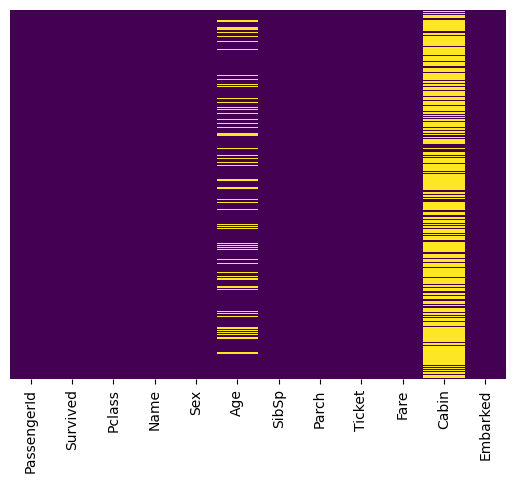

In [4]:
# Visualize missing data
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

<Axes: xlabel='Survived', ylabel='count'>

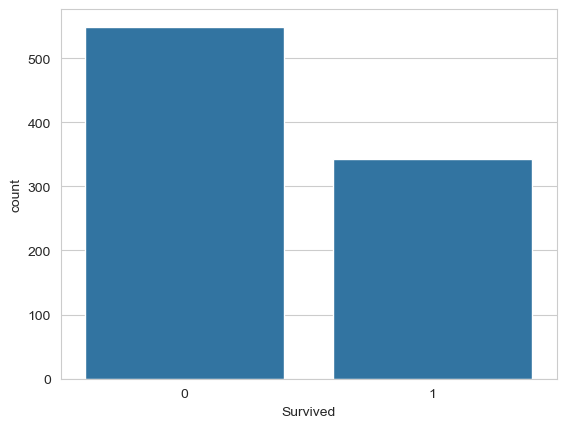

In [5]:
# Visualize the count of survivors
sns.set_style('whitegrid')  
sns.countplot(x='Survived', data=train) 

<Axes: xlabel='Survived', ylabel='count'>

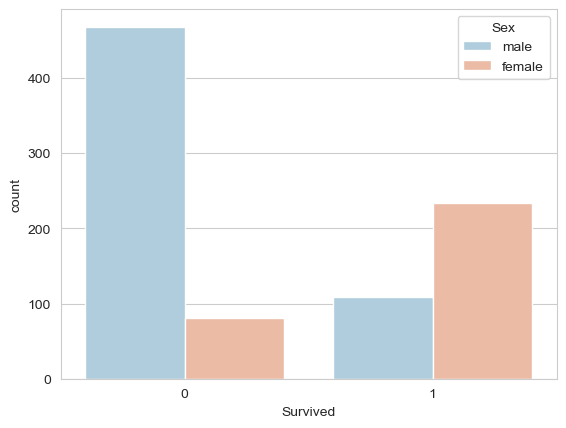

In [6]:
# Visualize the count of survivors by gender
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r') 

<Axes: xlabel='Survived', ylabel='count'>

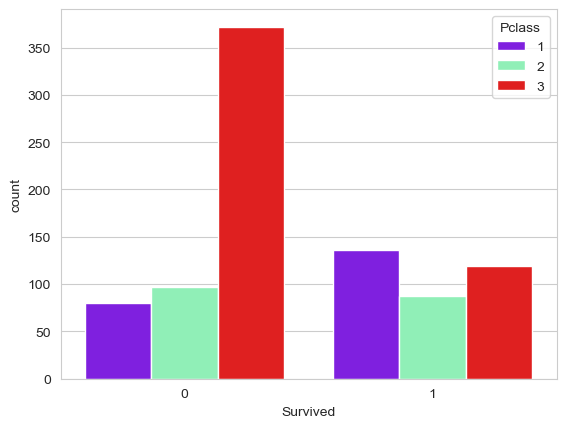

In [7]:
# Visualize the count of survivors by passenger class
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow') 

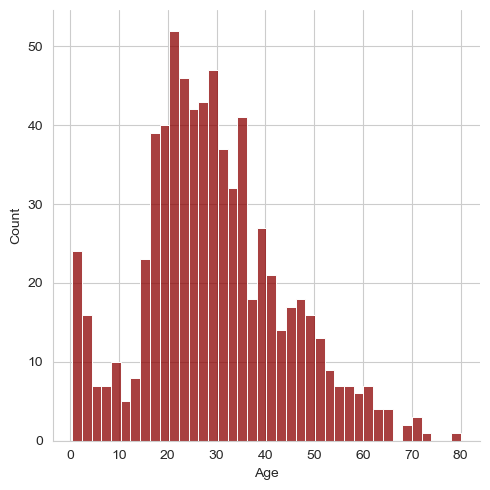

In [8]:
# Plot age distribution
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=40)

<Axes: >

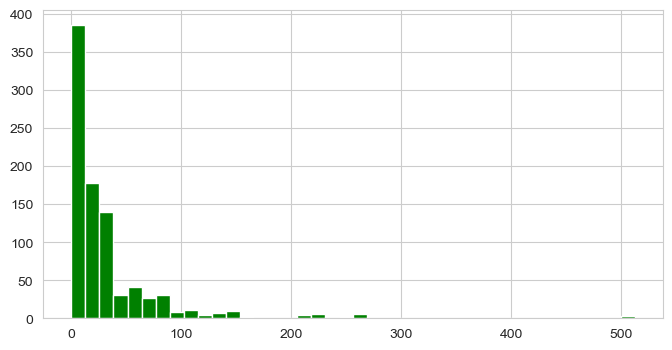

In [9]:
# Plot fare distribution
train['Fare'].hist(color='green', bins=40, figsize=(8,4))  # Plot a histogram

<Axes: xlabel='Pclass', ylabel='Age'>

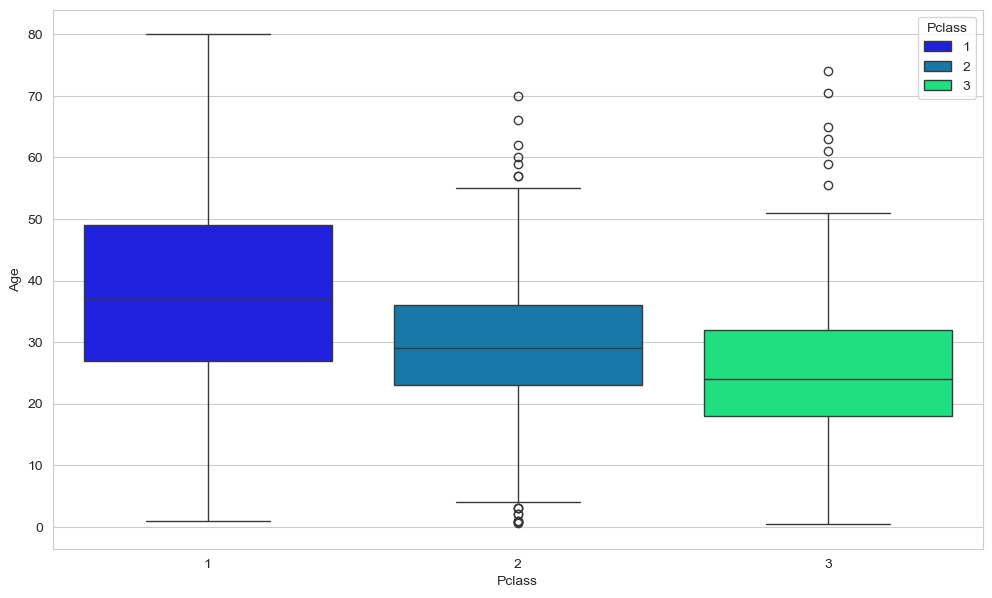

In [10]:
# Clean the data
# Visualize the relationship between Pclass and Age
plt.figure(figsize=(12,7))  # Set figure size
sns.boxplot(x='Pclass', y='Age', data=train, hue='Pclass', palette='winter')

In [11]:
# Function to impute missing ages based on passenger class
def impute_age(row):
    Age = row.iloc[0]  # Extract age
    Pclass = row.iloc[1]  # Extract passenger class
    
    if pd.isnull(Age):  # If age is missing
        if Pclass == 1:  # Assign age based on class
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age  # Return existing age if not missing

In [12]:
# Apply the impute_age function to the Age column
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [13]:
# Drop the 'Cabin' column since it contains too many missing values
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

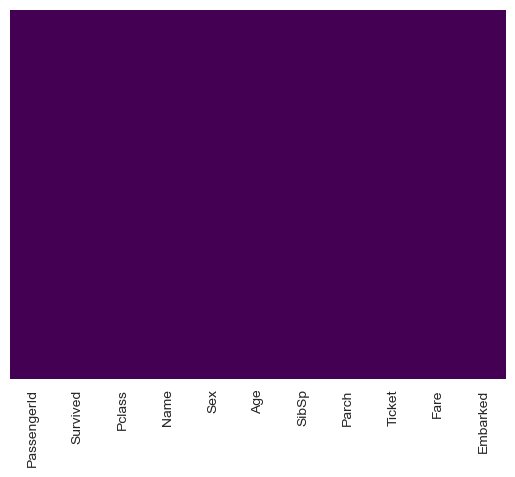

In [14]:
# Visualize missing data again after cleaning
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
# Convert categorical features to numeric values
# Convert 'Sex' and 'Embarked' to dummy variables
sex = pd.get_dummies(train['Sex'], drop_first=True)  
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [16]:
# Drop unnecessary columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [17]:
# Concatenate dummy variables back into the dataset
train = pd.concat([train, sex, embark], axis=1)

In [18]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Build a logistic regression model
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), 
                                                    train['Survived'], test_size=0.30, random_state=101)

In [21]:
# Initialize and train the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# Initialize and train the Decision Tree Classifier
tree_model = DecisionTreeClassifier()  
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# Make predictions using the logistic regression model
predictions_log = logmodel.predict(X_test)

In [24]:
# Make predictions using the Decision Tree Classifier
predictions_tree = tree_model.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [76]:
cm_log = confusion_matrix(y_test, predictions_log)

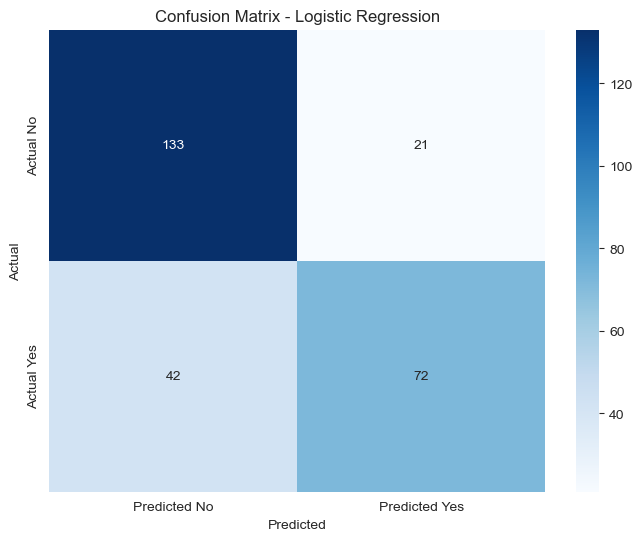

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
accuracy_log = accuracy_score(y_test, predictions_log) 
print("Accuracy (Logistic Regression):", accuracy_log)

Accuracy (Logistic Regression): 0.7649253731343284


In [68]:
from sklearn.metrics import confusion_matrix

In [70]:
cm_tree = confusion_matrix(y_test, predictions_tree)

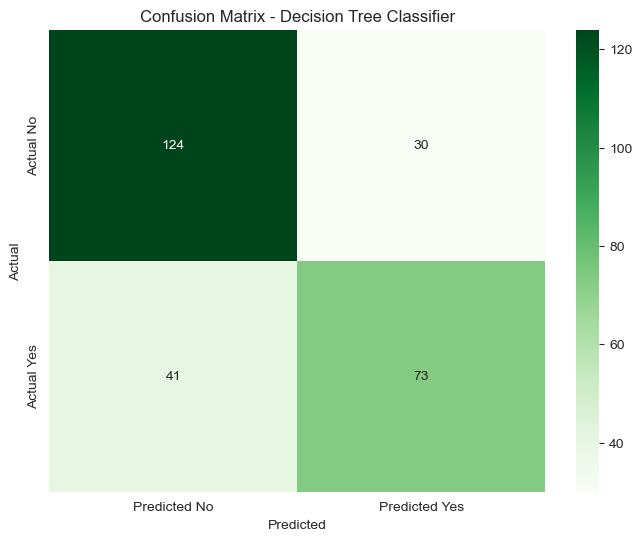

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
accuracy_tree = accuracy_score(y_test, predictions_tree)  
print("Accuracy (Decision Tree):", accuracy_tree)

Accuracy (Decision Tree): 0.7350746268656716


In [29]:
predictions_tree

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [30]:
print(y_test)

331    0
700    1
748    0
751    1
481    0
      ..
388    0
416    1
407    1
482    0
829    1
Name: Survived, Length: 268, dtype: int64
